In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [342]:
!ls

Hardcoded.ipynb                mnist_train_images.npy
MNIST-2-layer.-reference.ipynb mnist_train_labels.npy
linux_bckup.ipynb              mnist_validation_images.npy
mnist_test_images.npy          mnist_validation_labels.npy
mnist_test_labels.npy


In [3]:
X_train = np.load("mnist_train_images.npy")
y_train = np.load("mnist_train_labels.npy")
X_test = np.load("mnist_test_images.npy")
y_test = np.load("mnist_test_labels.npy")
X_validation = np.load("mnist_validation_images.npy")
y_validation = np.load("mnist_validation_labels.npy")

In [4]:
w = np.random.random([X_train.shape[1], y_train.shape[1]])
b = np.random.random([1,y_train.shape[1]])



model = {
    "w": w,
    "b": b
}    

In [5]:
def softmax(z):
#     z -= (np.max(z)/2)
    return (np.exp(z).T / np.sum(np.exp(z), axis=1))

def forward_pass(x, model):
    w= model["w"]
    b= model["b"]
    z = (x@w+b)
    a = softmax(z).T
#     y = np.argmax(a, axis=1)
    return a

def calculate_CE_loss(a, one_hot_y):
    cost = (-1 / a.shape[0]) * np.sum(one_hot_y * np.log(a))
    return cost

def calculate_regularization(w,alpha):
    REGULARIZATION = 0.5 * alpha * (w.T@w) 
    return REGULARIZATION
def backprop(prediction, x, y, model, alpha=0.01, lr=0.00001):
    w= model["w"]
    b= model["b"]
    grad_w = (-1/(x.shape[0]))*(x.T@(y-prediction)) + alpha * w
    w = w - lr*grad_w
    grad_b = -1*np.mean(y-prediction, axis = 0)
    b = b - lr*grad_b
    model["w"] = w
    model["b"] = b
    return model
def evaluate(x = X_validation, y = y_validation, model=model, alpha=0.1):
    prediction = forward_pass(x, model)
    CE_loss = calculate_CE_loss(prediction, y)
    w= model["w"]
    reg_loss = calculate_regularization(w,alpha)
    return CE_loss+reg_loss


In [6]:
def accuracy(y, y_true):
    return (sum(y == y_true)/len(y_true)) * 100
# Hyperparameters - GRID SEARCH
lrs = [3.3e-2]
alphas = [0.001]
batch_sizes = [10]
epochs = [100]

In [7]:
def relu(x):
    activated = np.maximum(0, x) #just for clarification
    return activated
def reluDerivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [8]:
i = 0
batch_size = 1000
data_x, data_y = X_train[(i)*batch_size:(i)*batch_size+batch_size,], y_train[(i)*batch_size:(i)*batch_size+batch_size,]



In [67]:
def softmax(z):
#     z -= np.max(z)
    z = (np.array(z).T - np.max(z, axis = 1)).T
    return (np.exp(z).T / np.sum(np.exp(z), axis=1))
# def softmax(x):
#     """Compute softmax values for each sets of scores in x."""
#     e_x = np.exp(x - np.max(x))
#     return (e_x / e_x.sum(axis=1)).T

many_neurons_1 = 75
w1 = np.random.random([data_x.shape[1], many_neurons_1])/10
b1 = np.random.random([1,many_neurons_1])/10

many_neurons_2 = 50
w2 = np.random.random([many_neurons_1, many_neurons_2])/10
b2 = np.random.random([1,many_neurons_2])/10

# many_neurons_2 = 50
w3 = np.random.random([many_neurons_2, data_y.shape[1]])/10
b3 = np.random.random([1,data_y.shape[1]])/10

## 2 hidden layer model

many_neurons_1 = 75
w1 = np.random.random([data_x.shape[1], many_neurons_1])/10
b1 = np.random.random([1,many_neurons_1])/10

many_neurons_2 = 50
w2 = np.random.random([many_neurons_1, many_neurons_2])/10
b2 = np.random.random([1,many_neurons_2])/10

# many_neurons_2 = 50
w3 = np.random.random([many_neurons_2, data_y.shape[1]])/10
b3 = np.random.random([1,data_y.shape[1]])/10

lrs = [3.3e-2]
alphas = [0.001]
batch_sizes = [100]
epochs = [200]

for lr in lrs:
    for alpha in alphas:
        for batch_size in batch_sizes:
            for epoch in epochs:
                batches = (int)(len(X_train)/batch_size)
                for _ in range(epoch):
                    for i in range(batches):
                        data_x, data_y = X_train[(i)*batch_size:(i)*batch_size+batch_size,], y_train[(i)*batch_size:(i)*batch_size+batch_size,]
                        z1 = np.dot(data_x,w1)+b1
                        a1 = relu(z1)
                        z2 = np.dot(a1,w2)+b2
                        a2 = relu(z2)
                        z3 = np.dot(a2,w3)+b3
                        a3 = softmax(z3).T

                        batch = len(data_x)
                        g = (np.subtract(a3,data_y))
                        db3 = np.mean(g, axis = 0) 
                        dw3 = (1/batch)* np.dot(a2.T,g)
                        dw3 += alpha * w3

                        g = np.multiply(np.dot(g,w3.T),reluDerivative(z2))
                        db2 = np.mean(g, axis = 0)
                        dw2 = (1/batch)* np.dot(a1.T,g)
                        dw2 += alpha * w2
                        
                        g = np.multiply(np.dot(g,w2.T),reluDerivative(z1))
                        db1 = np.mean(g, axis = 0)
                        dw1 = (1/batch)* np.dot(data_x.T,g)
                        dw1 +=  alpha * w1
                        
                        lr = 1e-2
                        w3 -= lr*dw3
                        w2 -= lr*dw2
                        w1 -= lr*dw1

                        b3 -= lr*db3
                        b2 -= lr*db2
                        b1 -= lr*db1

## Validation data - check accuracy

z1 = np.dot(X_validation,w1)+b1
a1 = relu(z1)
z2 = np.dot(a1,w2)+b2
a2 = relu(z2)
z3 = np.dot(a2,w3)+b3
a3 = softmax(z3).T
output = np.argmax(a3, axis=1)
actual_y = np.argmax(y_validation, axis=1)
validation_accuracy = accuracy(output,actual_y)
print(validation_accuracy) 

## Test data - check accuracy

z1 = np.dot(X_test,w1)+b1
a1 = relu(z1)
z2 = np.dot(a1,w2)+b2
a2 = relu(z2)
z3 = np.dot(a2,w3)+b3
a3 = softmax(z3).T
output = np.argmax(a3, axis=1)
actual_y = np.argmax(y_test, axis=1)
validation_accuracy = accuracy(output,actual_y)
print(validation_accuracy) 

## Multilayer - How to do it??

In [9]:
def init_params(input_size = 784, output_size=10, many_hidden_layers=4):
    params = {}
    nodes_in_layers = [75, 50, 25, 45, 30, 25, 20]
    for layer in range(many_hidden_layers+1):
        if(layer==0):
            params["w" + str(layer)]=np.random.random([input_size, nodes_in_layers[layer]])/20        
        elif(layer==(many_hidden_layers)):
            params["w" + str(layer)]=np.random.random([nodes_in_layers[layer-1], output_size])/20
        else:
            params["w" + str(layer)] = np.random.random([nodes_in_layers[layer-1], nodes_in_layers[layer]])/20

        if(layer==0):
            params["b" + str(layer)]=np.random.random([1, nodes_in_layers[layer]])/20
        elif(layer==(many_hidden_layers)):
            params["b" + str(layer)]=np.random.random([1, output_size])/20
        else:
            params["b" + str(layer)] = np.random.random([1, nodes_in_layers[layer]])/20
    return params

In [135]:
def init_params(input_size = 784, output_size=10, many_hidden_layers=4):
    params = {}
    nodes_in_layers = [75, 50, 25, 45, 30, 25, 20]
    for layer in range(many_hidden_layers+1):
        if(layer==0):
            c = nodes_in_layers[layer+1] ** -0.5
            params["w" + str(layer)]=np.random.uniform(-1*c/2,c/2,(input_size, nodes_in_layers[layer]))
            
        elif(layer==(many_hidden_layers)):
            c = nodes_in_layers[layer+1] ** -0.5
            params["w" + str(layer)]=np.random.uniform(-1*c/2,c/2,(nodes_in_layers[layer-1], output_size))
        else:
            c = nodes_in_layers[layer+1] ** -0.5
            params["w" + str(layer)]=np.random.uniform(-1*c/2,c/2,(nodes_in_layers[layer-1], nodes_in_layers[layer]))

        if(layer==0):
            params["b" + str(layer)]=np.full([1, nodes_in_layers[layer]], 0.1)
        elif(layer==(many_hidden_layers)):
            params["b" + str(layer)]=np.full([1, output_size], 0.1) 
        else:
            params["b" + str(layer)] = np.full([1, nodes_in_layers[layer]], 0.1)
    return params

In [11]:
# forward pass with unknown depth
# hey bhagwan!!
def forward_pass(data_x, params, many_hidden_layers):
    layer_cache = {}
    z_current = data_x
    for i in range(many_hidden_layers+1):
    #     affine transformation
        z_current = np.dot(z_current,params["w" + str(i)]) + params["b" + str(i)]
    #     activation 
        if(i == many_hidden_layers):
            a_current = softmax(z_current).T
        else:
            a_current = relu(z_current)
#         print("z mean = ", z_current.mean())
#         print("a mean = ",a_current.mean())
        layer_cache["z" + str(i)] = z_current;
        layer_cache["a" + str(i)] = a_current;
    return layer_cache

# x_current = softmax(x_current).T
# output = np.argmax(x_current, axis=1)
# actual_y = np.argmax(y_validation, axis=1)
# validation_accuracy = accuracy(output,actual_y)
# print(validation_accuracy) 

In [12]:
def calculate_derivatives(data_x, data_y,params, layer_cache, many_hidden_layers, alpha = 0.001):
    derivatives = {}
    batch = len(data_x)
    for i in reversed(range(many_hidden_layers+1)):
        if(i==many_hidden_layers):
            g = (np.subtract(layer_cache["a" + str(i)],data_y))
        else:
            g = np.multiply(np.dot(g,params["w" + str(i+1)].T),reluDerivative(layer_cache["z" + str(i)]))
        derivatives["b" + str(i)] = np.mean(g, axis = 0) 
        if(i==0):
            derivatives["w" + str(i)] = (1/batch)* np.dot(data_x.T,g)
            derivatives["w" + str(i)] += alpha * params["w" + str(i)]
        else:
            derivatives["w" + str(i)] = (1/batch)* np.dot(layer_cache["a" + str(i-1)].T,g)
            derivatives["w" + str(i)] += alpha * params["w" + str(i)]
    return derivatives

In [93]:
# update weights

def update_weights(params, derivatives, many_hidden_layers, prev_derivatives=derivatives,lr = 1e-3):
    for i in range(many_hidden_layers+1):
        params["w" + str(i)] -= lr*derivatives["w" + str(i)]
        params["b" + str(i)] -= lr*derivatives["b" + str(i)]
    return params

In [94]:
def calculate_accuracy(X, y,params, many_hidden_layers):
    layer_cache = forward_pass(X, params, many_hidden_layers)
    y_hat = layer_cache["a"+str(many_hidden_layers)]
    # x_current = softmax(y_hat).T
    output = np.argmax(y_hat, axis=1)
    actual_y = np.argmax(y, axis=1)
    accuracy_val = accuracy(output,actual_y)
    return accuracy_val  

params = init_params(input_size = 784, output_size=10, many_hidden_layers=4)

many_hidden_layers = 4
for _ in range(100000):
    layer_cache = forward_pass(data_x, params, many_hidden_layers)
    derivatives = calculate_derivatives(data_x, data_y,params, layer_cache, many_hidden_layers, alpha = 0.001)
    params = update_weights(params, derivatives, many_hidden_layers,lr = 1e-2)

y_hat = layer_cache["a"+str(many_hidden_layers)]
# x_current = softmax(y_hat).T
output = np.argmax(y_hat, axis=1)
actual_y = np.argmax(data_y, axis=1)
validation_accuracy = accuracy(output,actual_y)
print(validation_accuracy) 

layer_cache = forward_pass(X_validation, params, many_hidden_layers)
y_hat = layer_cache["a"+str(many_hidden_layers)]
# x_current = softmax(y_hat).T
output = np.argmax(y_hat, axis=1)
actual_y = np.argmax(y_validation, axis=1)
validation_accuracy = accuracy(output,actual_y)
print(validation_accuracy) 

In [184]:
def softmax(z):
    z -= np.max(z)
    return (np.exp(z).T / np.sum(np.exp(z), axis=1))


In [330]:
# JUGAAD for limited layers finding derivatives
# derivatives = calculate_derivatives(data_x, data_y,params, layer_cache, many_hidden_layers, alpha = 0.001)
def calculate_derivatives(data_x, data_y,params, layer_cache, many_hidden_layers, alpha = 0.001):
    batch = len(data_x)
    i = 2
    derivatives = {}
    g = (np.subtract(layer_cache["a"+str(i)],data_y))
    derivatives["b" + str(i)] = np.mean(g, axis = 0) 
    derivatives["w" + str(i)] = (1/batch)* np.dot(layer_cache["a"+str(i-1)].T,g)
    derivatives["w" + str(i)] += alpha * params["w"+str(i)]


    i = 1
    g = np.multiply(np.dot(g,params["w"+str(i+1)].T),reluDerivative(layer_cache["z"+str(i)]))
    derivatives["b" + str(i)] = np.mean(g, axis = 0)
    derivatives["w" + str(i)] = (1/batch)* np.dot(layer_cache["a"+str(i-1)].T,g)
    derivatives["w" + str(i)] += alpha * params["w"+str(i)]

    i = 0
    g = np.multiply(np.dot(g,params["w"+str(i+1)].T),reluDerivative(layer_cache["z"+str(i)]))
    derivatives["b" + str(i)] = np.mean(g, axis = 0)
    derivatives["w" + str(i)] = (1/batch)* np.dot(data_x.T,g)
    derivatives["w" + str(i)] +=  alpha * params["w"+str(i)]
    return derivatives
# update weights

def update_weights(params, derivatives, many_hidden_layers,lr = 1e-2):
    for i in range(many_hidden_layers+1):
        params["w" + str(i)] -= lr*derivatives["w" + str(i)]
        params["b" + str(i)] -= lr*derivatives["b" + str(i)]
    return params
def init_params(input_size = 784, output_size=10, many_hidden_layers=4):
    nodes_in_layers = [75, 50, 40, 30, 25, 20, 15]
    many_neurons_1 = 50
    layer = 0;
    params["w" + str(layer)] = np.random.random([data_x.shape[1], many_neurons_1])/10
    params["b" + str(layer)] = np.random.random([1,many_neurons_1])/10

    layer = 1;
    many_neurons_2 = 50
    params["w" + str(layer)] = np.random.random([many_neurons_1, many_neurons_2])/10
    params["b" + str(layer)] = np.random.random([1,many_neurons_2])/10

    layer = 2;
    # many_neurons_2 = 50
    params["w" + str(layer)] = np.random.random([many_neurons_2, data_y.shape[1]])/10
    params["b" + str(layer)] = np.random.random([1,data_y.shape[1]])/10
    return params

def softmax(z):
    z -= np.max(z)
#     z = (np.array(z).T - np.max(z, axis = 1)).T
    return (np.exp(z).T / np.sum(np.exp(z), axis=1))
# def forward_pass(data_x, params, many_hidden_layers):
#     layer_cache = {}
#     a_current = data_x
#     for i in range(many_hidden_layers):
#         z_current = np.dot(a_current,params["w" + str(i)]) + params["b" + str(i)]
#         a_current = relu(z_current)
#         layer_cache["z" + str(i)] = z_current;
#         layer_cache["a" + str(i)] = a_current;
#     q = many_hidden_layers
#     z_current = np.dot(a_current,params["w" + str(q)]) + params["b" + str(q)]
#     a_current = softmax(z_current).T
#     layer_cache["z" + str(q)] = z_current;
#     layer_cache["a" + str(q)] = a_current;
#     return layer_cache
def forward_pass(data_x, params, many_hidden_layers):
    layer_cache = {}
    i = 0
    layer_cache["z" + str(i)] = np.dot(data_x,params["w" + str(i)])+params["b" + str(i)]
    layer_cache["a" + str(i)] = relu(layer_cache["z" + str(i)])
    i = 1
    layer_cache["z" + str(i)] = np.dot(layer_cache["a" + str(i-1)],params["w" + str(i)])+params["b" + str(i)]
    layer_cache["a" + str(i)] = relu(layer_cache["z" + str(i)])
    i = 2
    layer_cache["z" + str(i)] = np.dot(layer_cache["a" + str(i-1)],params["w" + str(i)])+params["b" + str(i)]
    layer_cache["a" + str(i)] = softmax(layer_cache["z" + str(i)]).T
    return layer_cache
# def init_params(input_size = 784, output_size=10, many_hidden_layers=4):
#     params = {}
#     many_neurons_1 = 75
#     i = 0
#     params["w" + str(i)] = np.random.random([input_size, many_neurons_1])/10
#     params["b" + str(i)] = np.random.random([1,many_neurons_1])/10
#     i = 1
#     many_neurons_2 = 50
#     params["w" + str(i)] = np.random.random([many_neurons_1, many_neurons_2])/10
#     params["b" + str(i)] = np.random.random([1,many_neurons_2])/10
#     i = 2
#     # many_neurons_2 = 50
#     params["w" + str(i)] = np.random.random([many_neurons_2, data_y.shape[1]])/10
#     params["b" + str(i)] = np.random.random([1,output_size])/10

In [334]:
many_hidden_layers = 2
params =init_params(input_size = 784, output_size=10, many_hidden_layers=many_hidden_layers)
train_acc_epoch = []
val_acc_epoch = []


In [335]:
lrs = [3.3e-3]
alphas = [0.05]
batch_sizes = [50]
epochs = [50]
# epoch = 60
best_accuracy = 0;
for lr in lrs:
    for alpha in alphas:
        for batch_size in batch_sizes:
            for epoch in epochs:
                batches = (int)(len(X_train)/batch_size)
                for cur_epoch in range(epoch):
                    for i in range(batches):
                        data_x, data_y = X_train[(i)*batch_size:(i)*batch_size+batch_size,], y_train[(i)*batch_size:(i)*batch_size+batch_size,]
                        layer_cache = forward_pass(data_x, params, many_hidden_layers)
                        derivatives = calculate_derivatives(data_x, data_y,params, layer_cache, many_hidden_layers, alpha = alpha)
                        params = update_weights(params, derivatives, many_hidden_layers,lr = lr)

                    train_acc = calculate_accuracy(data_x, data_y,params, many_hidden_layers)
                    val_acc = calculate_accuracy(X_validation, y_validation,params, many_hidden_layers)
                    train_acc_epoch = np.append(train_acc_epoch, train_acc)
                    val_acc_epoch = np.append(val_acc_epoch, val_acc)
                    if(val_acc>best_accuracy):
                        best_accuracy = val_acc
                        print("best acc =", val_acc," @ ", cur_epoch)
                #print(val_acc)

best acc = 10.02  @  0
best acc = 19.06  @  1
best acc = 33.800000000000004  @  2
best acc = 44.54  @  3
best acc = 52.6  @  4
best acc = 59.56  @  5
best acc = 69.16  @  6
best acc = 74.96000000000001  @  7
best acc = 77.16  @  8
best acc = 78.08  @  9
best acc = 78.94  @  10
best acc = 79.62  @  11
best acc = 80.06  @  12
best acc = 80.66  @  13
best acc = 81.0  @  14
best acc = 81.22  @  15
best acc = 81.42  @  16
best acc = 81.66  @  17
best acc = 81.88  @  18
best acc = 81.92  @  19
best acc = 82.0  @  20
best acc = 82.04  @  21
best acc = 82.1  @  22
best acc = 82.22  @  23
best acc = 82.26  @  24
best acc = 82.36  @  25
best acc = 82.38  @  26
best acc = 82.42  @  30
best acc = 82.44  @  31
best acc = 82.5  @  32
best acc = 82.58  @  33
best acc = 82.69999999999999  @  34
best acc = 82.8  @  35
best acc = 82.86  @  37
best acc = 82.92  @  38
best acc = 82.94  @  44
best acc = 83.0  @  46
best acc = 83.04  @  47


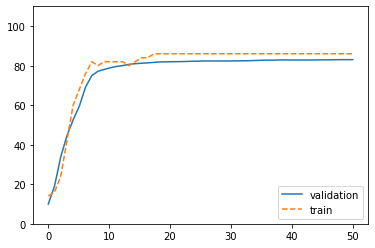

In [336]:
x = np.linspace(0, len(val_acc_epoch),len(val_acc_epoch))
plt.plot(x, val_acc_epoch,'-', label="validation")
plt.plot(x, train_acc_epoch,'--', label="train")
plt.legend(loc="lower right")
plt.ylim(0, 110)
plt.show()

In [270]:
calculate_accuracy(X_test, y_test,params, many_hidden_layers)

10.32

In [271]:
layer_cache = forward_pass(X_validation, params, many_hidden_layers)
y_hat = layer_cache["a"+str(many_hidden_layers)]
# x_current = softmax(y_hat).T
output = np.argmax(y_hat, axis=1)
actual_y = np.argmax(y_validation, axis=1)
validation_accuracy = accuracy(output,actual_y)
print(validation_accuracy) 

9.76


In [338]:
params["w1"]

array([[ 0.10194213, -0.01195478,  0.03922353, ...,  0.04119096,
        -0.01976633,  0.00063907],
       [ 0.02103306,  0.05833214,  0.02538046, ...,  0.01762809,
         0.02981448,  0.00351028],
       [ 0.04568727, -0.02085826, -0.0127703 , ..., -0.01540765,
        -0.02444906,  0.00578733],
       ...,
       [ 0.08433523,  0.00961607,  0.04051312, ...,  0.04035895,
        -0.00447297,  0.0009995 ],
       [-0.02394386,  0.10627409,  0.01373619, ...,  0.00610433,
         0.06861395,  0.00576608],
       [ 0.08997332, -0.05825473,  0.03089847, ...,  0.08263235,
        -0.01367402, -0.00417524]])

In [343]:
derivatives["w0"]

array([[5.30363228e-08, 3.00482769e-07, 3.44325760e-07, ...,
        4.26094088e-07, 2.10437857e-08, 1.53813265e-07],
       [6.29070804e-08, 4.89103863e-07, 3.71565101e-07, ...,
        2.12693558e-07, 2.87903270e-07, 5.26319921e-07],
       [3.86422062e-07, 3.30723221e-07, 3.82347322e-07, ...,
        4.97614257e-07, 5.36100882e-07, 4.86199296e-07],
       ...,
       [2.37017437e-07, 1.90986024e-07, 6.30915507e-08, ...,
        5.39785744e-07, 4.29632716e-07, 5.26962466e-07],
       [3.00041591e-07, 2.05229139e-07, 1.96571014e-07, ...,
        5.36561223e-07, 1.50894557e-07, 3.09616915e-07],
       [6.70588630e-08, 7.43051869e-08, 5.47903237e-07, ...,
        1.26095723e-07, 5.56454092e-07, 3.37906551e-07]])

In [344]:
a=3

In [346]:
a = np.array([1,2,4])

In [347]:
a.shape

(3,)